# Quantum Computing Workshop

In [1]:
# Setup

import qiskit

## Demo

### Stages

1. Building
    * Define the quantum circuit
2. Transpiling
    * Optimize your quantum circuit
    * Reduces circuit depth
    * Implements error mitigation technique
3. Verify
    * Run circuit locally for testing
    * Debugging
4. Run

### Building

Making Bell states

> NOTE: CNOT gates are very expensive and most architectures must decompose it into several different gates, massively increasing circuit depth

In [13]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Default of a qubit is ket-0
a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
A = ClassicalRegister(1, "A")
B = ClassicalRegister(1, "B")

bell_circuit = QuantumCircuit(a, b, B, A)

# Gates
bell_circuit.h(a)
bell_circuit.cx(a,b)

# Measures
bell_circuit.measure(b, B)
bell_circuit.measure(a, A)

display(bell_circuit.draw())

┌───┐        ┌─┐
  a: ┤ H ├──■─────┤M├
     └───┘┌─┴─┐┌─┐└╥┘
  b: ─────┤ X ├┤M├─╫─
          └───┘└╥┘ ║ 
B: 1/═══════════╩══╬═
                0  ║ 
A: 1/══════════════╩═
                   0

#### Qubit Ordering

[QK Docs](https://docs.quantum.ibm.com/build/bit-ordering)

* Ket: $\left| q_{n-1}q_{n-2}...q_1q_0 \right>$
* Circuit Diagram: $q_{n-1}$ at the bottom line to $q_0$ is the top line

#### Circuit Depth

The number of gates that have to be applied sequentially

In [14]:
print(f"Circuit Depth: {bell_circuit.depth()}")

Circuit Depth: 3


## Transpiling


For running on an actual quantum computer 

### Architecture

Modify circuit instructions to match the Instruction Set Architecture of the selected quantum device

### Resilience

Modifying circuit against interference and noise

### Optimising

Modifying circuit to reduce circuit depth

In [ ]:
## below code is some of the code required to get it on an actual quantum computer

# from qiskit_ibm_runtime import QiskitRuntimeService
# from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# service = QiskitRuntimeService()

# pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
# isa_circuit = pm.run(bell_circuit)

# display(isa_circuit.draw(idle_wires=False))

#### Local Running

In [33]:
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

# circuit with 2 qubits
qc = QuantumCircuit(2)
qc.h(0) # h-gate on qbit 0
qc.cx(0,1) # cnot-gate on qbit 0, 1

qc.measure_all()
qc.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

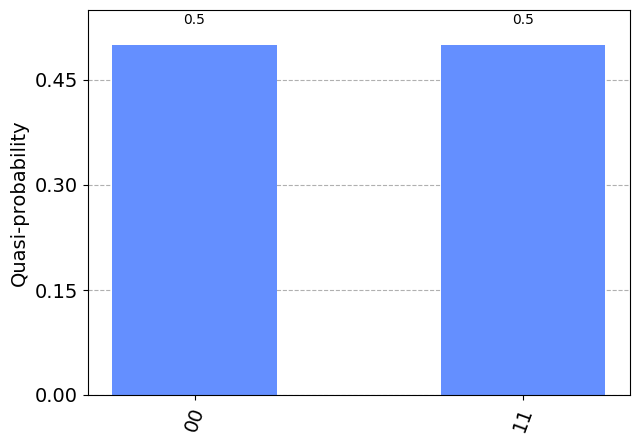

In [34]:
results = Sampler().run(qc).result() # default num_shots = 1024
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))